## Plots of the results of the benchmarks

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.figsize'] = [30, 9]
plt.rcParams['legend.fontsize'] = 'medium'

In [2]:
x = [i for i in range(50,10000, 50)]

def read(filename):
    for i in range(1,6):
        name = filename + '_%d'%i + '.txt'
        fname = os.path.join('test', name)    
        if(i==1):
            mat = np.array([np.loadtxt(fname)])
        else:
            mat = np.concatenate((mat, [np.loadtxt(fname)]), axis=0)
    mat_avg = mat.mean(0)
    mat_std = mat.std(0)
    return mat_avg, mat_std

def plot(l, xlabel):
    for i in l:
        plt.errorbar(x, i[0], yerr=i[1], fmt=i[2], ecolor=i[3], label = i[4]);
        plt.xlabel(xlabel)
        plt.ylabel("Time $\mu$s")
        plt.legend(prop={'size': 20})

label1 = "Number of terms retrieved"
label2 = "Number of posting lists retrieved"
label3 = "Number of terms + posting lists retrieved"

Time to retrieve a term in the dictionary:

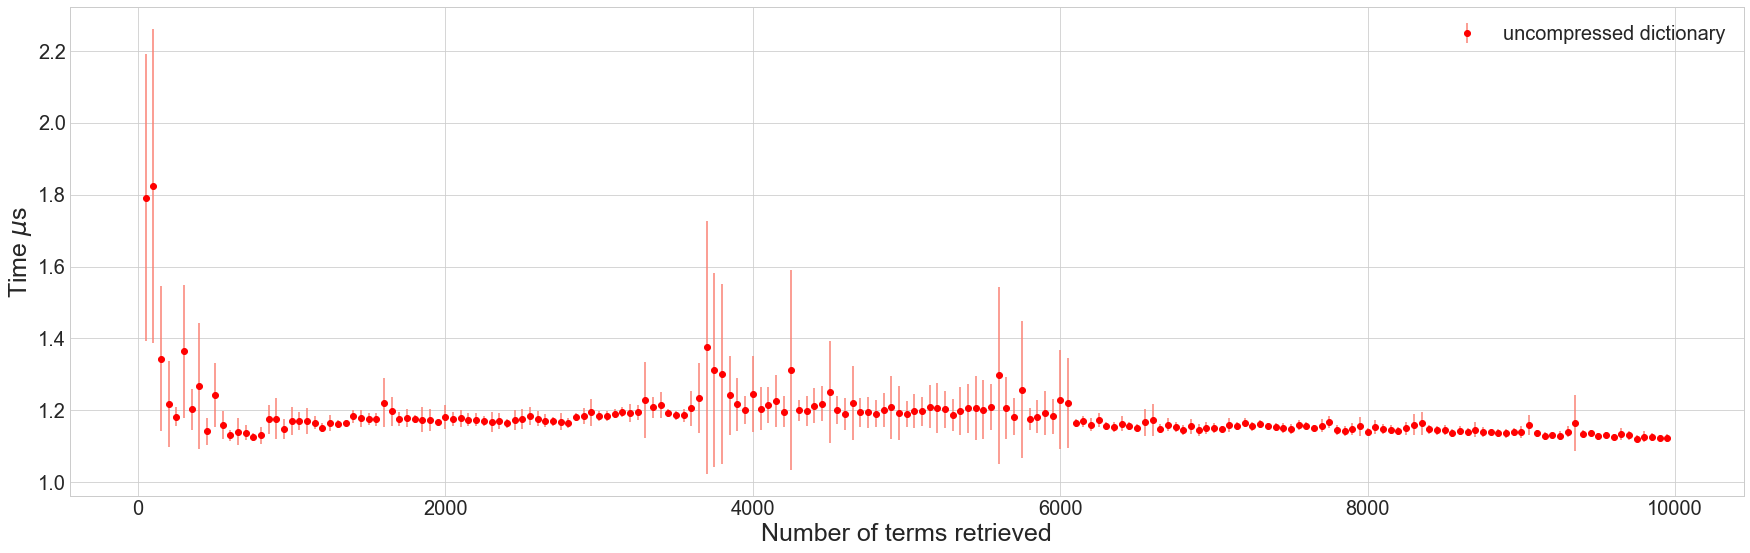

In [3]:
d_avg, d_std = read('dict')
ld = [[d_avg, d_std, 'ro', 'salmon', 'uncompressed dictionary']]
plot(ld, label1)

Time to retrieve a term in the compressed dictionary:

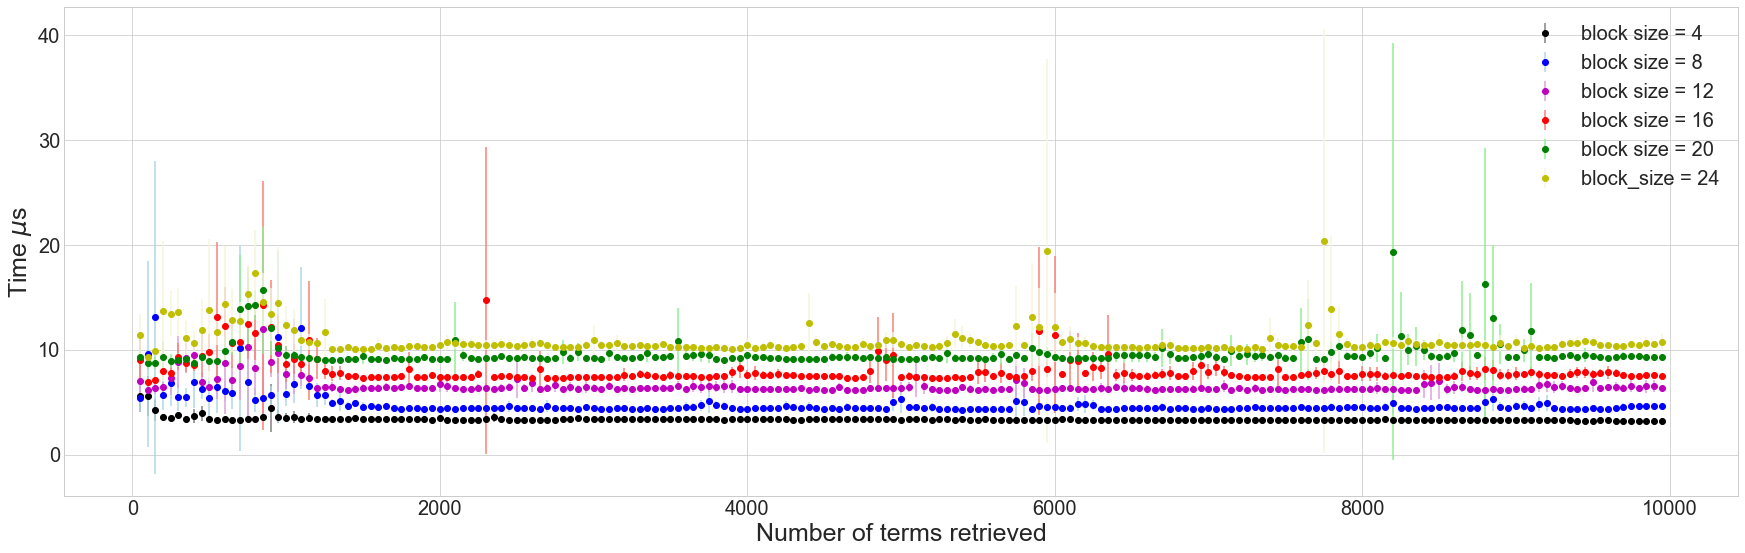

In [4]:
cd_avg, cd_std = read('compress_dict')
cdl = [cd_avg, cd_std, 'ko', 'grey', 'block size = 4']
cd_8_avg, cd_8_std = read('compress_8_dict')
cd8l = [cd_8_avg, cd_8_std, 'bo', 'lightblue', 'block size = 8']
cd_12_avg, cd_12_std = read('compress_12_dict')
cd12l = [cd_12_avg, cd_12_std, 'mo', 'plum', 'block size = 12']
cd_16_avg, cd_16_std = read('compress_16_dict')
cd16l = [cd_16_avg, cd_16_std, 'ro', 'salmon', 'block size = 16']
cd_20_avg, cd_20_std = read('compress_20_dict')
cd20l = [cd_20_avg, cd_20_std, 'go', 'lightgreen', 'block size = 20']
cd_24_avg, cd_24_std = read('compress_24_dict')
cd24l = [cd_24_avg, cd_24_std, 'yo', 'beige', 'block_size = 24']

l = [cdl, cd8l, cd12l, cd16l, cd20l, cd24l]
plot(l, label1)

Time to retrieve a posting list:

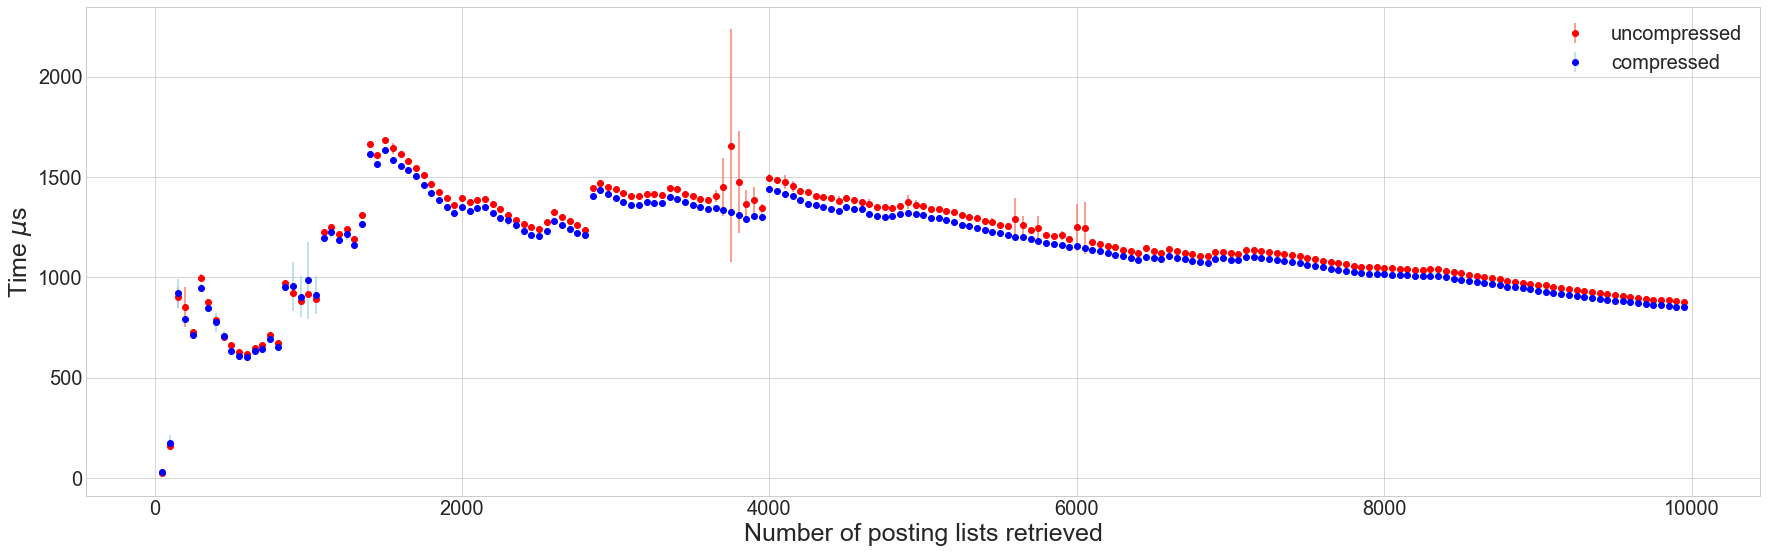

In [5]:
#uncompressed
pl_avg, pl_std = read('post')
pll = [pl_avg, pl_std, 'ro', 'salmon', 'uncompressed']
#compressed
cpl_avg, cpl_std = read('compress_post')
cpll = [cpl_avg, cpl_std, 'bo', 'lightblue', 'compressed']
#plot
pl = [pll, cpll]
plot(pl, label2)

Time to retrieve in the tree:

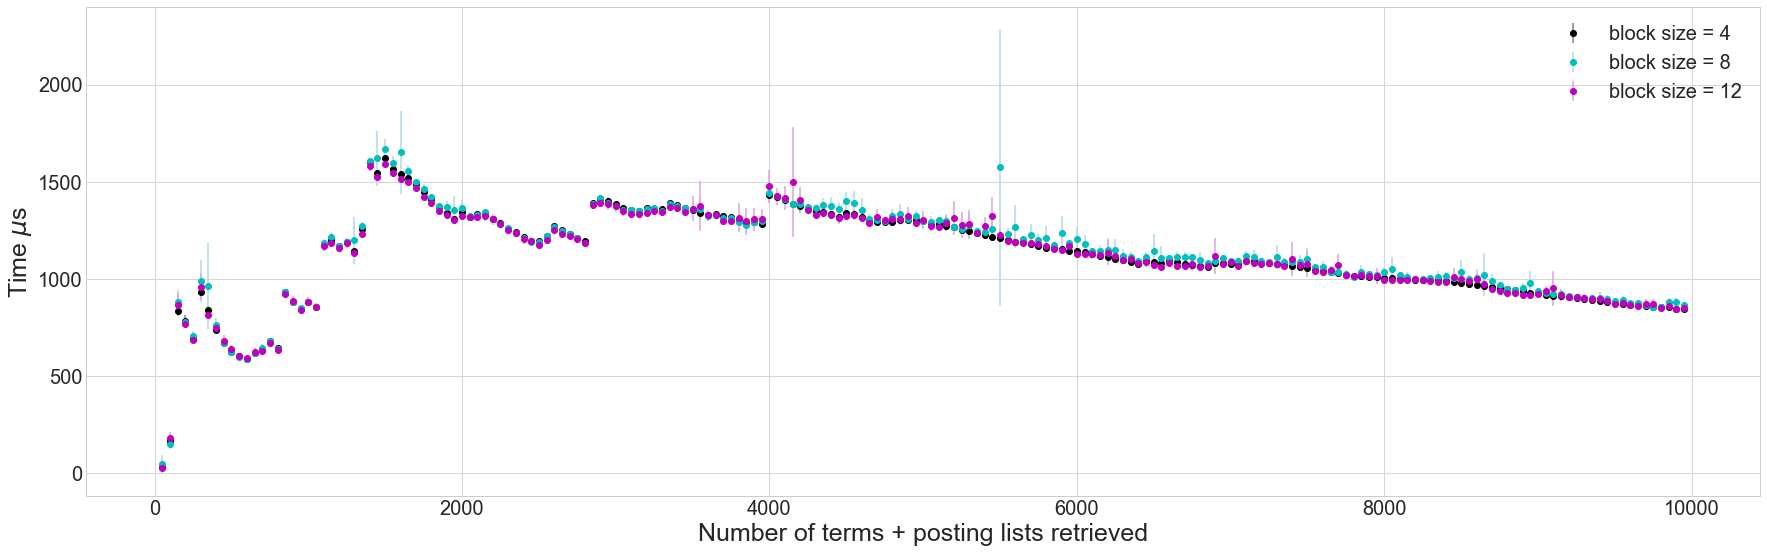

In [6]:
t_avg, t_std = read('tree')
tl = [t_avg, t_std, 'ko', 'grey', 'block size = 4']
t8_avg, t8_std = read('tree_8')
t8l = [t8_avg, t8_std, 'co', 'lightblue', 'block size = 8']
t12_avg, t12_std = read('tree_12')
t12l = [t12_avg, t12_std, 'mo', 'plum', 'block size = 12']

btl = [tl, t8l, t12l] 
plot(btl, label3)

Time to retrieve only terms in the tree:

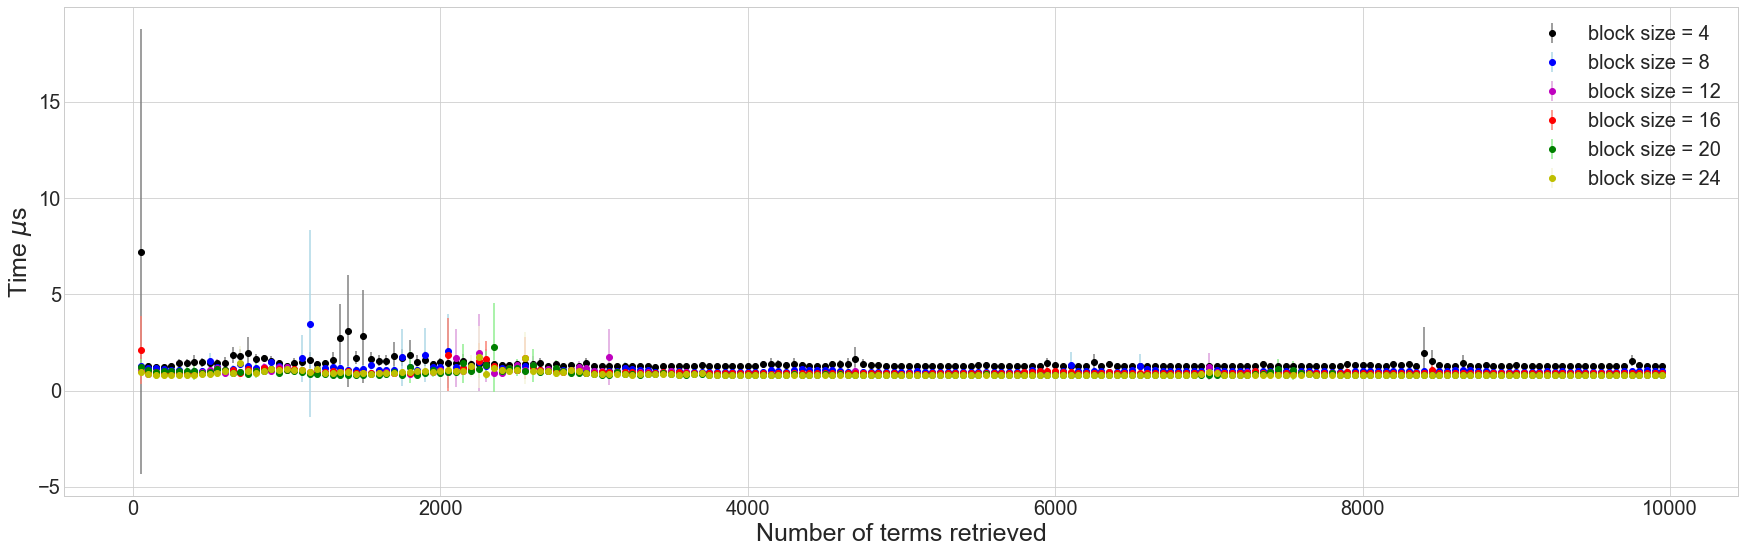

In [7]:
tt_avg, tt_std = read('tree_term')
ttl = [tt_avg, tt_std, 'ko', 'grey', 'block size = 4']
tt8_avg, tt8_std = read('tree_8_term')
tt8l = [tt8_avg, tt8_std, 'bo', 'lightblue', 'block size = 8']
tt12_avg, tt12_std = read('tree_12_term')
tt12l = [tt12_avg, tt12_std, 'mo', 'plum', 'block size = 12']
tt16_avg, tt16_std = read('tree_16_term')
tt16l = [tt16_avg, tt16_std, 'ro', 'salmon', 'block size = 16']
tt20_avg, tt20_std = read('tree_20_term')
tt20l = [tt20_avg, tt20_std, 'go', 'lightgreen', 'block size = 20']
tt24_avg, tt24_std = read('tree_24_term')
tt24l = [tt24_avg, tt24_std, 'yo', 'beige', 'block size = 24']
tt100_avg, tt100_std = read('tree_100')
tt100l = [tt100_avg, tt100_std, 'ro', 'salmon', 'block size = 100']

bttl = [ttl, tt8l, tt12l, tt16l, tt20l, tt24l]
plot(bttl, label1)

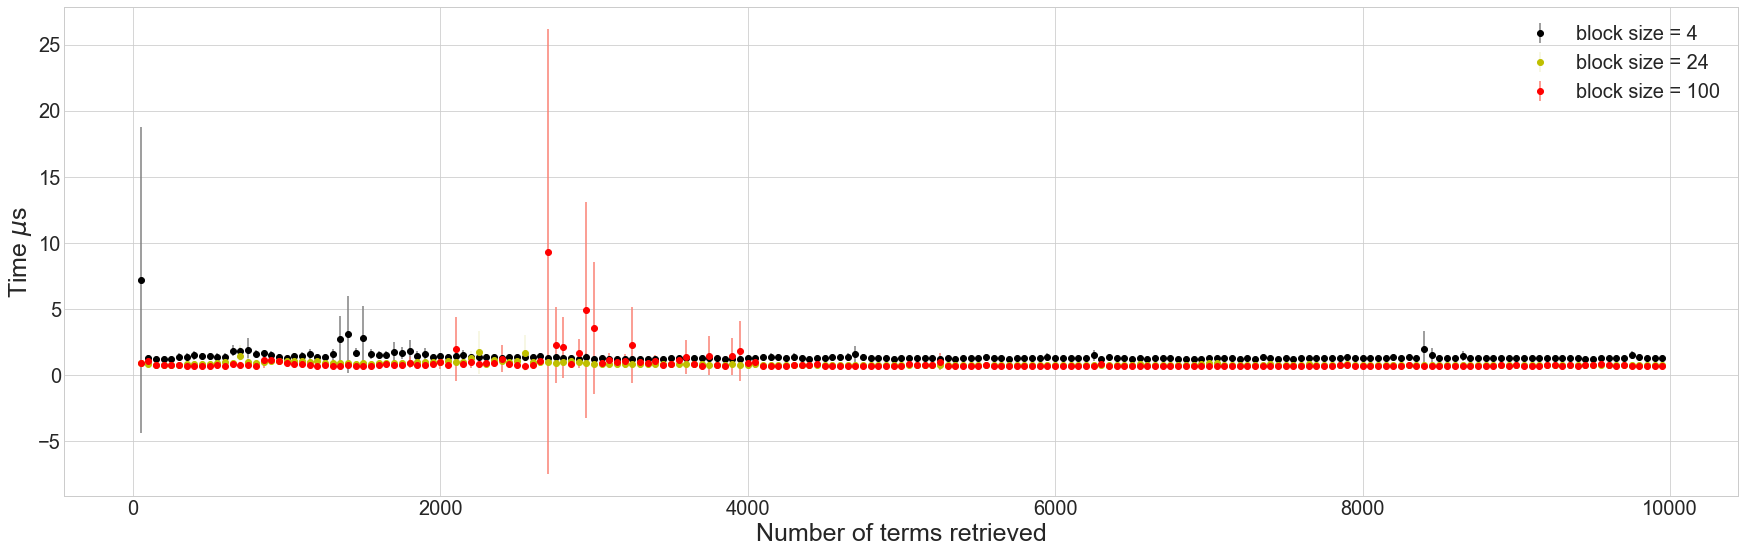

In [8]:
ll = [ttl, tt24l, tt100l]
plot(ll, label1)

## Dimensions

In [9]:
#dictionary
blocks = [4, 8 ,12, 16, 20, 24]
byte = [106958, 100722, 98602, 97505, 96936, 96552]
kilobyte = [107, 101, 99, 98, 97, 97]

non_compressed_dict = [144857, 145] #bytes/kilobytes

#posting list
posting_list = [6160827, 6.2] #bytes/megabytes
pl_compressed = [1362888, 1.4] #bytes/megabytes